In [59]:
#1b) Construct a descriptive analysis for the selected dataset. 
#1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [61]:
#2.Load dataset
df = pd.read_csv('synthetic_employee_burnout.csv')

print("dataset shape before cleaning:", df.shape)


dataset shape before cleaning: (2000, 10)


In [63]:
#3 Preview dataset for first 5 rows 
df.head()


,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,Max Ivanov,32.0,Male,Analyst,3.0,60.0,21.0,4.40,1.0,0.0
1,Max Wang,40.0,Female,Engineer,9.0,47.0,67.0,2.09,2.0,0.0
2,Nina Petrov,33.0,Female,Engineer,2.0,44.0,20.0,2.58,3.0,0.0
3,John Ivanov,35.0,Female,Manager,6.0,44.0,70.0,3.23,8.0,0.0
4,John Wang,59.0,Male,Sales,8.0,38.0,46.0,4.41,1.0,0.0


In [65]:
#4: Basic dataset info
print("\nDataset Info:")
df.info()

#5: Descriptive statistics
print("\nSummary Statistics:")
display(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2000 non-null   object 
 1   Age                1989 non-null   float64
 2   Gender             2000 non-null   object 
 3   JobRole            2000 non-null   object 
 4   Experience         1977 non-null   float64
 5   WorkHoursPerWeek   1963 non-null   float64
 6   RemoteRatio        1970 non-null   float64
 7   SatisfactionLevel  1973 non-null   float64
 8   StressLevel        1977 non-null   float64
 9   Burnout            1986 non-null   float64
dtypes: float64(7), object(3)
memory usage: 156.4+ KB

Summary Statistics:


,Age,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
count,1989.000000,1977.000000,1963.000000,1970.000000,1973.000000,1977.000000,1986.000000
mean,40.673705,10.091553,49.612837,50.088832,2.992676,5.431462,0.064451
std,11.279984,9.171125,11.834868,29.148866,1.155934,2.882040,0.245617
min,22.000000,0.000000,30.000000,0.000000,1.000000,1.000000,0.000000
25%,31.000000,3.000000,39.000000,24.000000,2.000000,3.000000,0.000000
50%,41.000000,7.000000,49.000000,49.000000,3.020000,5.000000,0.000000
75%,50.000000,15.000000,60.000000,75.000000,4.000000,8.000000,0.000000
max,60.000000,39.000000,70.000000,100.000000,5.000000,10.000000,1.000000


In [67]:
#6check missing values
df.isnull().sum()

Name                  0
Age                  11
Gender                0
JobRole               0
Experience           23
WorkHoursPerWeek     37
RemoteRatio          30
SatisfactionLevel    27
StressLevel          23
Burnout              14
dtype: int64

In [69]:
#Drop rows where Burnout is missing Since it can not be used for training
df = df.dropna(subset=['Burnout'])

In [71]:
# 4. Define columns 
integer_cols = ['Age', 'Experience', 'WorkHoursPerWeek', 'RemoteRatio', 'StressLevel']
float_cols = ['SatisfactionLevel']  # continuous


In [73]:
#6check missing values
df.isnull().sum()

Name                  0
Age                   5
Gender                0
JobRole               0
Experience           19
WorkHoursPerWeek     30
RemoteRatio          25
SatisfactionLevel    19
StressLevel          16
Burnout               0
dtype: int64

In [75]:
# 5. Fill missing values  integer_cols with rounded value - and  float_cols keep it float
for col in integer_cols:
    df[col].fillna(round(df[col].mean()), inplace=True)  #integer 

for col in float_cols:
    df[col].fillna(df[col].mean(), inplace=True)  

C:\Users\xhish\AppData\Local\Temp\ipykernel_32680\2688856890.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(round(df[col].mean()), inplace=True)  #integer
C:\Users\xhish\AppData\Local\Temp\ipykernel_32680\2688856890.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [77]:
#6check missing values
df.isnull().sum()

Name                 0
Age                  0
Gender               0
JobRole              0
Experience           0
WorkHoursPerWeek     0
RemoteRatio          0
SatisfactionLevel    0
StressLevel          0
Burnout              0
dtype: int64

In [79]:
#4: Basic dataset info
print("\nDataset Info:")
df.info()

#5: Descriptive statistics
print("\nSummary Statistics:")
display(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1986 non-null   object 
 1   Age                1986 non-null   float64
 2   Gender             1986 non-null   object 
 3   JobRole            1986 non-null   object 
 4   Experience         1986 non-null   float64
 5   WorkHoursPerWeek   1986 non-null   float64
 6   RemoteRatio        1986 non-null   float64
 7   SatisfactionLevel  1986 non-null   float64
 8   StressLevel        1986 non-null   float64
 9   Burnout            1986 non-null   float64
dtypes: float64(7), object(3)
memory usage: 170.7+ KB

Summary Statistics:


,Age,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,40.670191,10.107251,49.597180,50.069990,2.994077,5.431017,0.064451
std,11.261646,9.130792,11.753466,28.983755,1.151065,2.871474,0.245617
min,22.000000,0.000000,30.000000,0.000000,1.000000,1.000000,0.000000
25%,31.000000,3.000000,40.000000,25.000000,2.000000,3.000000,0.000000
50%,41.000000,8.000000,49.000000,50.000000,3.000000,5.000000,0.000000
75%,50.000000,15.000000,59.000000,75.000000,3.990000,8.000000,0.000000
max,60.000000,39.000000,70.000000,100.000000,5.000000,10.000000,1.000000


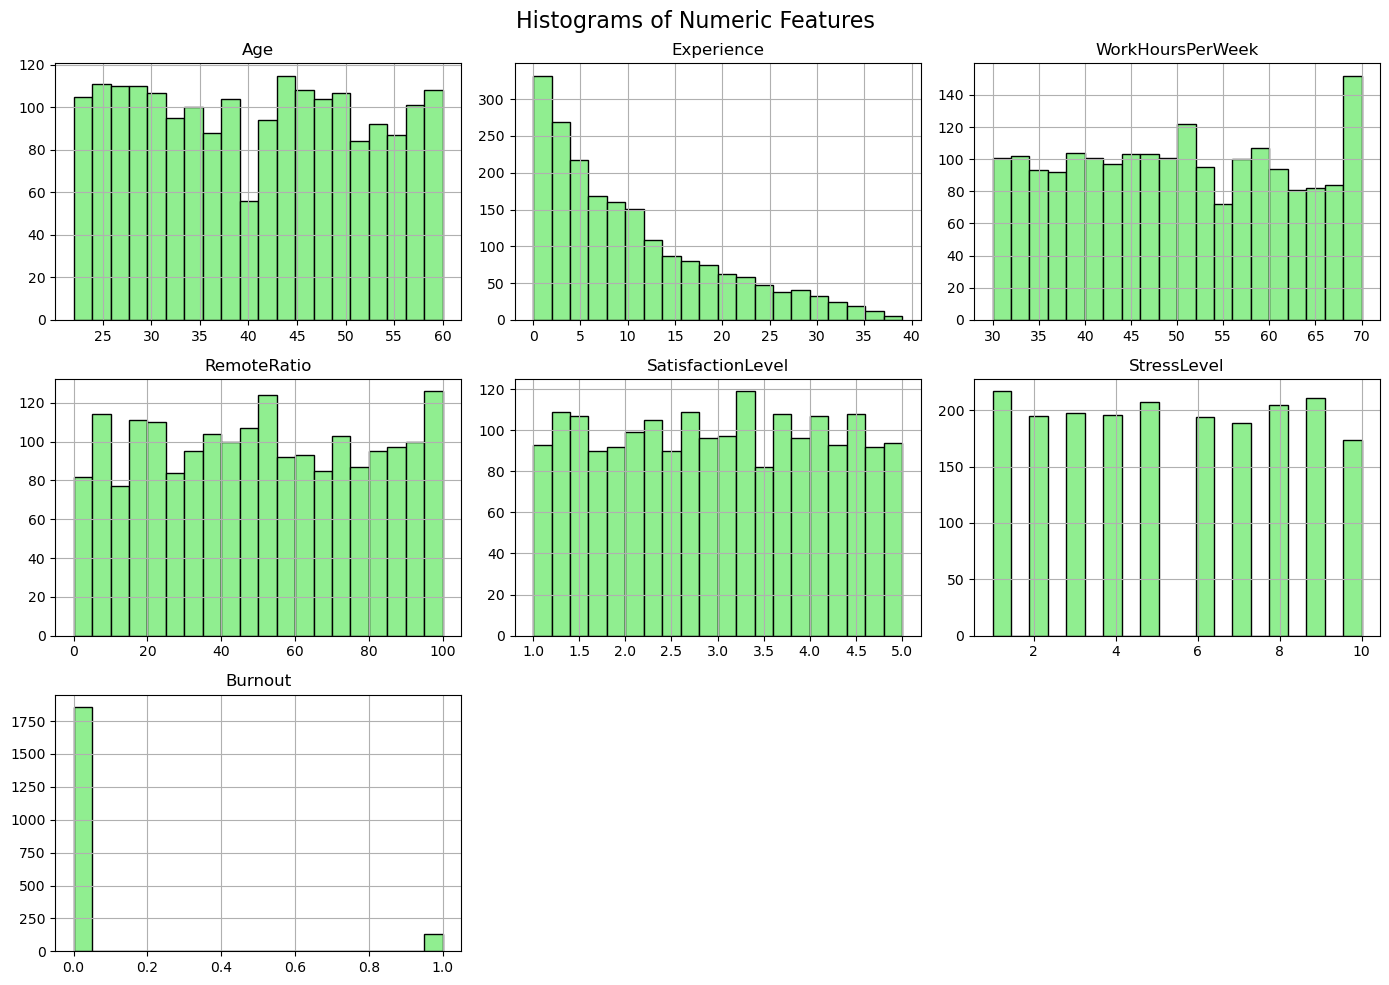

In [81]:
# Histograms
df.hist(bins=20, figsize=(14, 10), color='lightgreen', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\xhish\AppData\Local\Temp\ipykernel_32680\2145958213.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


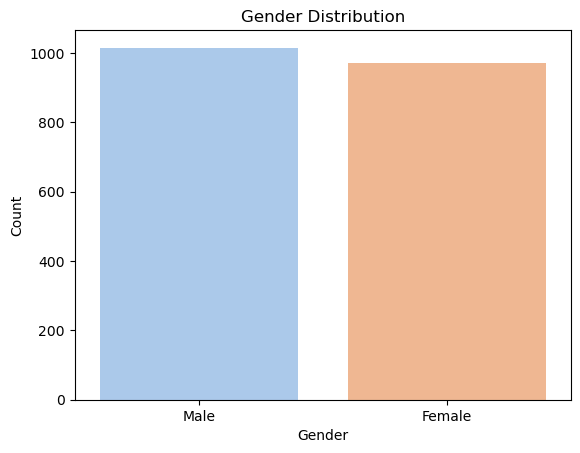

In [82]:

sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


C:\Users\xhish\AppData\Local\Temp\ipykernel_32680\1024684448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobRole', data=df, palette='muted', order=df['JobRole'].value_counts().index)


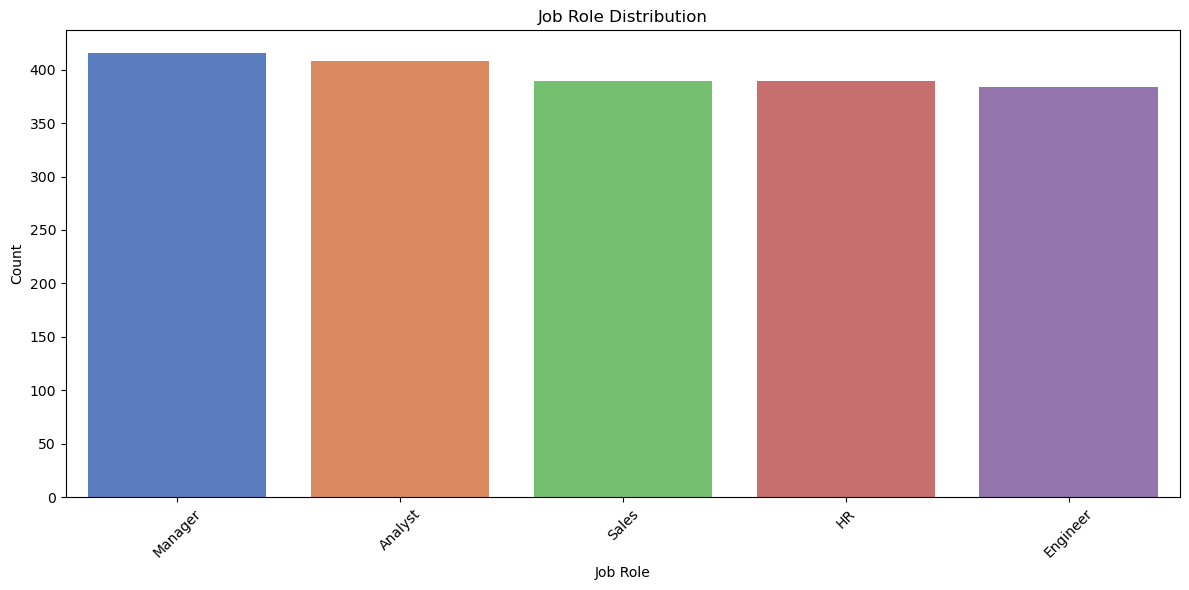

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', data=df, palette='muted', order=df['JobRole'].value_counts().index)
plt.title("Job Role Distribution")
plt.xticks(rotation=45)
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


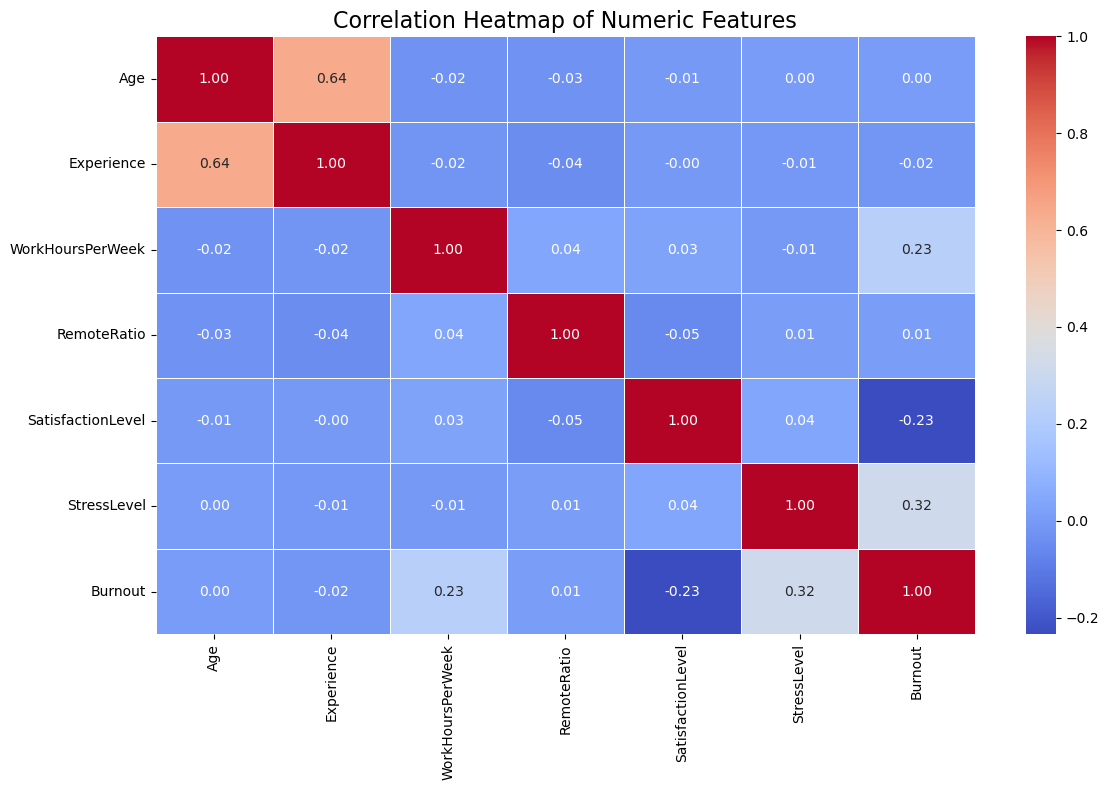

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Set up the heatmap plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


In [85]:
# Select features for Logistic Regression
selected_features_logreg = ['StressLevel', 'WorkHoursPerWeek', 'SatisfactionLevel']
X_logreg = df[selected_features_logreg]
y = df['Burnout']

In [86]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_logreg, y, test_size=0.2, random_state=42)


In [89]:
# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [91]:
# Predict on test data  LogisticRegression
y_pred = logreg.predict(X_test)

# Evaluate model LogisticRegression
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       376
         1.0       0.75      0.55      0.63        22

    accuracy                           0.96       398
   macro avg       0.86      0.77      0.81       398
weighted avg       0.96      0.96      0.96       398

Confusion Matrix:
 [[372   4]
 [ 10  12]]


In [96]:
# Drop target and non-relevant columns
X_all = df.drop(columns=['Burnout', 'Name'])
y = df['Burnout']

# One-hot encode categorical features (Gender, JobRole)
X_all_encoded = pd.get_dummies(X_all, drop_first=True)


In [99]:

# Train-test split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_all, y_train_all)

RandomForestClassifier(random_state=42)

In [101]:
# Get feature importances
importances = rf_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_all_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show all features and their importance
print("All Feature Importances (Descending Order):")
print(feature_importance_df)

All Feature Importances (Descending Order):
              Feature  Importance
5         StressLevel    0.324133
4   SatisfactionLevel    0.274026
2    WorkHoursPerWeek    0.247395
3         RemoteRatio    0.049665
0                 Age    0.038886
1          Experience    0.038565
6         Gender_Male    0.007143
10      JobRole_Sales    0.005638
9     JobRole_Manager    0.005180
8          JobRole_HR    0.004868
7    JobRole_Engineer    0.004500


In [103]:
# Select  the top 3 features
selected_top3 = ['StressLevel', 'SatisfactionLevel', 'WorkHoursPerWeek']
X_top3 = df[selected_top3]
y_top3 = df['Burnout']


In [105]:
# Split the dataset into training and testing sets 80% and 20% testing
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(
    X_top3, y_top3, test_size=0.2, random_state=42
)

In [107]:

rf_top3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top3.fit(X_train_top3, y_train_top3)

RandomForestClassifier(random_state=42)

In [109]:
# Initialize and train the Random Forest model ( 100 trees in the forest )
y_pred_top3 = rf_top3.predict(X_test_top3)

print("Confusion Matrix - Random Forest (Top 3 Features):")
print(confusion_matrix(y_test_top3, y_pred_top3))

print("\nClassification Report - Random Forest (Top 3 Features):")
print(classification_report(y_test_top3, y_pred_top3, target_names=["No Burnout", "Burnout"]))


Confusion Matrix - Random Forest (Top 3 Features):
[[376   0]
 [  1  21]]

Classification Report - Random Forest (Top 3 Features):
              precision    recall  f1-score   support

  No Burnout       1.00      1.00      1.00       376
     Burnout       1.00      0.95      0.98        22

    accuracy                           1.00       398
   macro avg       1.00      0.98      0.99       398
weighted avg       1.00      1.00      1.00       398



In [115]:
import joblib
joblib.dump(rf_top3, 'burnout_model_rf.pkl')


['burnout_model_rf.pkl']